# Japanese Charecter Recognition with Convolutional Neural Networks
### Erik Holmgren
### December 10th, 2018

## Introduction


Since last summer, I have been studying the Japanese language whenever I have time. Admittedly I haven't made too much progress, but I've learned the basics including the two phonetic alphabets, some vocabulary, and basic grammar. However, there is one aspect to Japanese (and other Asian languages) that many learners struggle with, and that is learning the large number of logographic characters. Often when studying, I'll come across a character I've never seen before. There are a few ways to go about identifying a character, the traditional way is by the characters 'radicals' - smaller pieces that make up and give meaning to the character. https://kanji.sljfaq.org/ has a computerized radical search, and additionally has a tool to attempt to match a character drawn onto an html canvas on the page. I've found myself using tools like this often, and started thinking about making one of my own as an experiment in convolutional neural networks.



## Background

### A brief explanation of Japanese written language

The written Japanese language consists of three types of characters. Two phonetic scripts, called _hiragana_ and _katakana_ represent the sounds of the vowels _a i u e o_ both by themselves and adjoined with the consonants _k s t n h m y r and w_. Additionally, two marks known as _dakuten and handakuten_, resembling an open double quote and a small circle, are written to the top-right of a hiragana or katakana character. Dakuten indicate a consinet should be 'voiced', turning 't' into 'd', 'h' into 'b',and 's' into 'z', while handakuten indicate a sound should be 'half voiced', turning 'h' into 'p'. Together, these two scripts make up the _kana_, and (for the most part) represent the sounds used in the Japanese language. 

#### Hiragana
| * | * | k | s | t | n | h | m | y | r | w | n (by itself) | g | z | d | b | p |
|---|---|----|----|----|----|----|----|----|----|----|---------------|----|----|----|----|----|
| a | あ | か | さ | た | な | は | ま | や | ら | わ | ん | が | ざ | だ | ば | ぱ |
| i | い | き | し | ち | に | ひ | み | * | り | * | * | ぎ | じ | ぢ | び | ぴ |
| u | う | く | す | つ | ぬ | ふ | む | ゆ | る | * | * | ぐ | ず | づ | づ | ぷ |
| e | え | け | せ | て | ね | へ | め | * | れ | * | * | げ | ぜ | で | べ | ぺ |
| o | お | こ | そ | と | の | ほ | も | よ | ろ | を | * | ご | ぞ | ど | ぼ | ぽ |

#### Katakana
| * | * | k | s | t | n | h | m | y | r | w | n (by itself) | g | z | d | b | p |
|---|---|----|----|----|----|----|----|----|----|----|---------------|----|----|----|----|----|
| a | ア | カ | サ | タ | ナ | ハ | マ | ヤ | ラ | ワ | ン | ガ | ザ | ダ | バ | パ |
| i | イ | キ | シ | チ | ニ | ヒ | ミ | * | リ | * | * | ギ | ジ | ヂ | ビ | ピ |
| u | ウ | ク | ス | ツ | ヌ | フ | ム | ユ | ル | * | * | グ | ズ | ヅ | ヅ | プ |
| e | エ | ケ | セ | テ | ネ | ヘ | メ | * | レ | * | * | ゲ | ゼ | デ | ベ | ペ |
| o | オ | コ | ソ | ト | ノ | ホ | モ | ヨ | ロ | ヲ | * | ゴ | ゾ | ド | ボ | ポ |

Hiragana is used to spell and modify native Japanese words, while katakana is used to indicate a 'loan word' a word phonetically borrowed from another language. For instance 'computer', spelled　'コンピューター' (the ー character extends the pronunciation length of the preceding character) is effectively pronounced 'ko-n-pyuu-taa'. There are additional sounds in katakana used to transcribe sounds not native to Japanese, but for brevity I won't describe them or any further mechanics of the kana in this report.  

The final type of characters, which I briefly described above, are _kanji_. These characters originated in the written Chinese language, and usually hold a similar meaning in Japanese and Chinese. Depending on context, kanji may be read (pronounced) with the native Japanese word, or an adaption of the Chinese pronunciation. While modern Chinese requires the knowledge of three or four thousand characters, only a few more than two thousand are used in Japanese. Precisely, 2136 are known as the _joyo_ kanji, are taught during Japanese primary and secondary school. 


#### The first 20 joyo kanji
| 亜 | 哀 | 挨 | 愛 | 曖 |
|----|----|----|----|----|
| 悪 | 握 | 圧 | 扱 | 宛 |
| 嵐 | 安 | 案 | 暗 | 以 |
| 衣 | 位 | 囲 | 医 | 依 |


### Convolutional Neural Networks

Convolutional neural networks have shown great promise for learning patterns from data with _spacial relationship_. That is, data where points have some relation to their neighbors. Modeled after our understanding of the biological visual cortex, CNNs have become the DeFacto network when analyzing natural language, time series data, and images. CNNs work by learning _filters_ to recognize patterns in data. In a convolutional layer, a tensor called a filter examines groups of neighboring points, finding similarities between that group of data and the pattern contained in the filter. This is achieved by summing the product of corresponding elements in the input data and the filter. The result is a number which represents how 'strongly' that group of data points matches the filter. Multiple filters are used, each moved (or convolved) across the input. The output from this layer of convolving filters is a tensor with dimensions corresponding to the number of convolutions of each filter, each with their own depth dimension.  

A _pooling layer_ then examines neighboring points in this convolutional output, and outputs either the maximum or average of that group of points. This reduces the dimension of the problem by discarding information we've found not to be important, such as the results of applying a filter to some group of data that did not match the pattern in the filter.  

CNNs are composed of some architecture of these convolutional, filter, and pooling layers. Typically, the output of the last pooling or convolutional layer is connected to a fully connected network which then learns to make sense of the features found by the filter layers.




## Data

The most comprehensive data on Japanese characters I could find is that maintained by the national 'Electrotechnical Laboratory' of Japan, also known as the 'National Institute of Advanced Industrial Science and Technology'. [Known as the ETL Character Database](http://etlcdb.db.aist.go.jp/), this is a collection of datasets of various character types collected during the end of the 20th century. The individual datasets are as follows:  
ETL1 - Hand written numbers, Roman characters, symbols, and katakana  
ETL2 - Machine printed kanji, hiragana, Roman characters, symbols, and numbers  
ETL3 - Hand written Roman characters, numbers, and symbols  
ETL4 - Hand written hiragana  
ETL5 - Hand written katakana  
ETL6 - Hand written katakana, Roman characters, numbers, and symbols  
ETL7 - Hand written hiragana with dakuten and handakuten  
ETL8 - Hand written Kyoiku kanji (a subset of the joyo kanji), hiragana  
ETL9 - Hand written joyo kanji, hiragana  
Apart from character types, datasets differ in how they were collected and the format of the records. The small numbered datasets were collected first (mid 70s), and have lower scan resolution and quality. All records in a dataset are stored in a continuous binary format, but python code for extracting them is provided.  

I had hoped to build a classifier that could identify all three types of characters, but ran into quality problems with the scans of katakana characters. I hope to add them to the next iteration, but will need to work on preprocessing methods to prepare the data.  

I decided to use data from the ETL8 and ETL9 datasets, as they contained the highest resolution scans (127 by 128), and were in one of the easier formats to work with.


In [1]:
import struct
import pickle
import time
import numpy as np
from skimage import transform
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

from importlib import reload
import etl_tools as et

import gc
gc.collect()

matplotlib.rc("font", family="Source Han Sans JP")

reload(et);

The `etl_tools` module is a collection of functions I wrote to read and process these datasets. Because it could take upwards of 3 hours to import the data from the original format, I stored the numpy arrays as pickles for easy use. I decided to use the ETL8 dataset for my inital training and testing data, as the samples were cleaner and more consistant.

In [2]:
with open("pickles/etl8gX.pickle", "rb") as f:
    data = pickle.load(f)

with open("pickles/etl8gY.pickle", "rb") as f:
    labels = pickle.load(f)

data.shape, labels.shape

((157740, 16256), (157740,))

In [3]:
np.unique(labels).shape

(957,)

Here are the first 64 samples, with labels under each image. In total this dataset contains 157740 samples of 957 charecters.

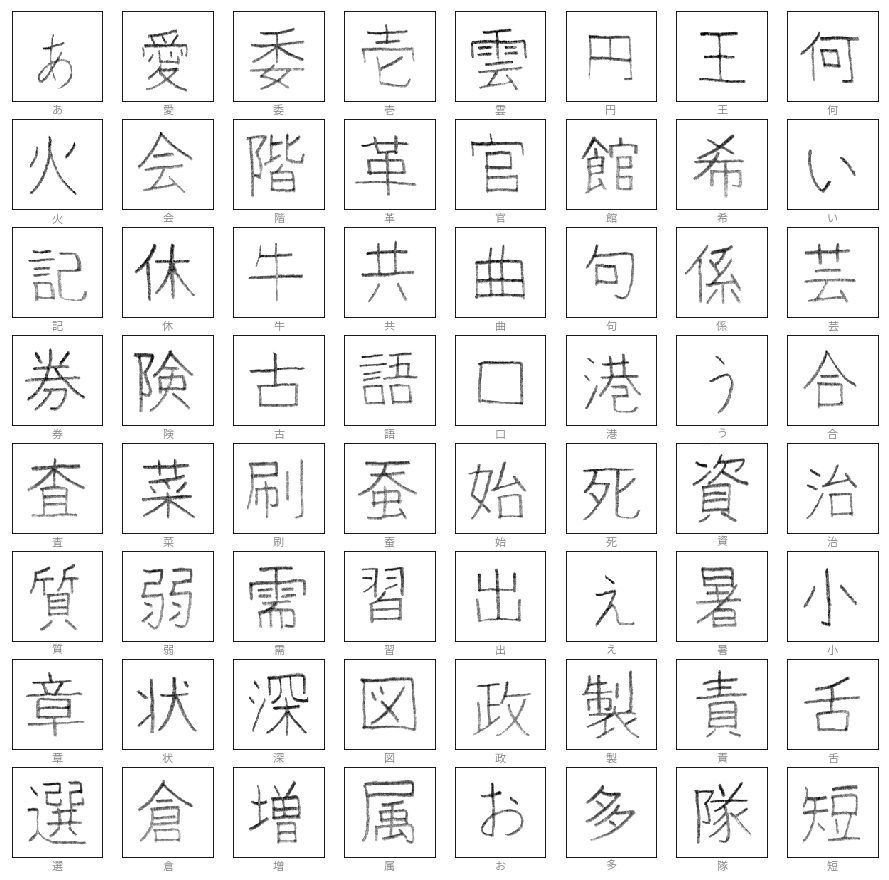

In [4]:
et.sqr_plot_numpy(data, labels, 8, (127, 128))

## Methods

127 by 128 pixel images are larger than we need and way to large to fit on my GPU, while I wanted to use something in the range of 40 - 60 pixels squared, the largest images I could get to succussfully train were 28 by 28.

In [5]:
im_resize = (28, 28)

In [6]:
processed_data = np.zeros((data.shape[0], im_resize[0] * im_resize[1]), dtype=np.float16)

In [7]:
for i in range(data.shape[0]):
    if i != 0 and ((i / data.shape[0]) * 100) % 10 == 0:
        print(i, end=' ')
    normalized = (data[i] / data[i].max()).reshape((127, 128))
    resized = transform.resize(normalized, im_resize)
    reduced = (resized > .04)
    processed_data[i] = reduced.astype(np.float16).flatten()

/opt/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


15774 31548 47322 63096 

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/opt/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


78870 94644 110418 126192 141966 

In addition to downsizing the images, I've normalized the values across each sample and then set all pixels above a threshold to 1 and the rest to 0. Here's what the processed images look like.

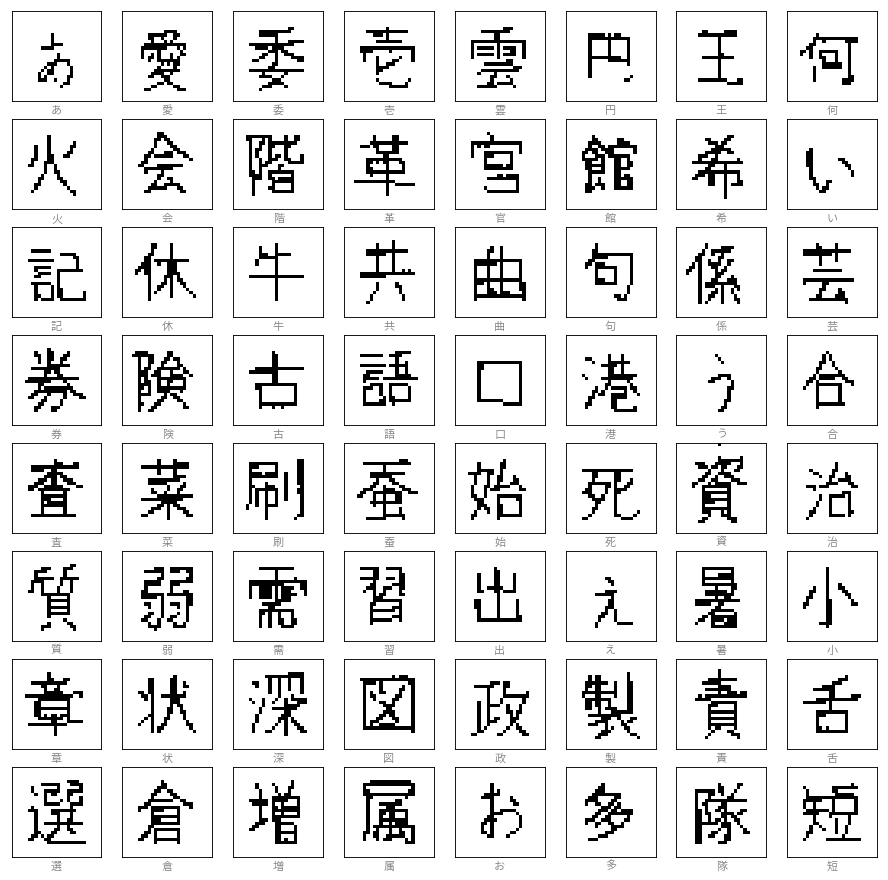

In [8]:
et.sqr_plot_numpy(processed_data.astype(np.float32), labels, 8, im_resize)

Some detail is certanly lost, but most charecters are still distinct. Now let's split into training and testing sets.

In [9]:
np.random.seed(42)

rand_inds = np.random.permutation(processed_data.shape[0])
train_inds = rand_inds[:int(.8 * processed_data.shape[0])]
test_inds = rand_inds[int(.8 * processed_data.shape[0]):]

train_inds.shape, test_inds.shape

((126192,), (31548,))

In [10]:
XTrain = processed_data.take(train_inds, axis=0).astype(np.float16)
YTrain = labels.take(train_inds, axis=0)

Lets make sure the data and labels still match up.

'目'

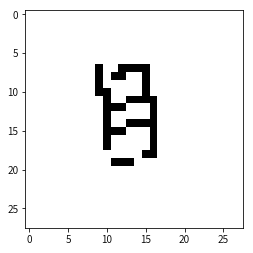

In [11]:
plt.imshow(XTrain[0].reshape(im_resize).astype(np.float32), cmap="Greys")
YTrain[0]

In [12]:
XTest = processed_data.take(test_inds, axis=0).astype(np.float16)
YTest = labels.take(test_inds, axis=0)

In [13]:
XTrain.shape, XTest.shape, YTrain.shape, YTest.shape

((126192, 784), (31548, 784), (126192,), (31548,))

Tensorflow might not like unicode data for targets, so lets make indicator variables.

In [14]:
characters = sorted(np.unique(labels).tolist())
indicators = list(range(len(characters)))

lookup_indicator = {characters[i] : indicators[i] for i in range(len(characters))}
len(lookup_indicator)

957

In [15]:
lookup_indicator['あ'], lookup_indicator['中']

(1, 86)

In [16]:
lookup_character = {i: c for c, i in lookup_indicator.items()}
len(lookup_character)

957

In [17]:
lookup_character[1], lookup_character[86]

('あ', '中')

In [18]:
YTrain_inds = np.zeros(YTrain.shape, dtype=np.int)

for i in range(YTrain.shape[0]):
    YTrain_inds[i] = lookup_indicator[YTrain[i]]

In [19]:
lookup_character[YTrain_inds[0]]

'目'

In [20]:
YTest_inds = np.zeros(YTest.shape, dtype=np.int)

for i in range(YTest.shape[0]):
    YTest_inds[i] = lookup_indicator[YTest[i]]

Well train in batches, so here's a function to return the next batch of data.

In [21]:
def get_batch(n, batch_size):
    start = n * batch_size
    fin = (n + 1) * batch_size
    Xs = XTrain[start: fin,]
    Ys = YTrain_inds[start: fin]
    return Xs, Ys

The following tensorflow code is adopted from examples provided with Aurélien Géron's book "Hands-On Machine Learning with Scikit-Learn and TensorFlow"

In [22]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

The original model provided by Géron for MNIST had two convolutional layers followed by a pooling layer, then a fully connected layer. In addition to changing input and output dimensions, I had to add another pooling layer between the convolutional layers to further downsample the data and allow successful training on my GPU (NVIDIA 1070 with 8GB VRAM). I would like to have been able to compare the effictivness of networks created for MNIST on this data, but found I ran out of memory with most of them.  

I also exparimented with different fully connected structurs after the convolutional and pooling layers, but found they had little effect on the outcome. Deep networks did tend to overfit the training set and do poorly on the testing set, so I setteled on a single layer with 1024 neurons.

In [23]:
height = im_resize[0]
width = im_resize[0]
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

pool2_fmaps = conv1_fmaps

conv3_fmaps = 64
conv3_ksize = 3
conv3_stride = 1
conv3_pad = "SAME"
conv3_dropout_rate = 0.25

pool4_fmaps = conv3_fmaps

n_fc1 = 1024
fc1_dropout_rate = 0.3

n_fc2 = 128
fc2_dropout_rate = 0.5

n_fc3 = 288
fc3_dropout_rate = 0.7

n_outputs = 957

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
    training = tf.placeholder_with_default(False, shape=[], name='training')

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")

with tf.name_scope("pool2"):
        pool2 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
        pool2_flat = tf.reshape(pool2, shape=[-1, pool2_fmaps * (height // 2) * (width // 2)])
        pool2_flat_drop = tf.layers.dropout(pool2_flat, conv3_dropout_rate, training=training)

conv3 = tf.layers.conv2d(pool2, filters=conv3_fmaps, kernel_size=conv3_ksize,
                         strides=conv3_stride, padding=conv3_pad,
                         activation=tf.nn.relu, name="conv3")

with tf.name_scope("pool4"):
    pool4 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool4_flat = tf.reshape(pool4, shape=[-1, pool4_fmaps * (height // 4) * (width // 4)])
    pool4_flat_drop = tf.layers.dropout(pool4_flat, conv3_dropout_rate, training=training)

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool4_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)
    
#with tf.name_scope("fc2"):
#    fc2 = tf.layers.dense(fc1, n_fc2, activation=tf.nn.relu, name="fc2")
#    fc2_drop = tf.layers.dropout(fc2, fc2_dropout_rate, training=training)
    
#with tf.name_scope("fc3"):
#    fc3 = tf.layers.dense(fc2, n_fc3, activation=tf.nn.relu, name="fc3")
#    fc3_drop = tf.layers.dropout(fc3, fc3_dropout_rate, training=training)

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

## Results

Training was supprisingly fast even on GPU. It would take about 2 mibutes to train a with 15 epochs of batches of 100

In [24]:
n_epochs = 15
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(XTrain.shape[0] // batch_size):
            X_batch, y_batch = get_batch(iteration, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: XTest, y: YTest_inds})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./j_char_model")

0 Train accuracy: 0.89 Test accuracy: 0.83323824
1 Train accuracy: 0.98 Test accuracy: 0.8784392
2 Train accuracy: 0.99 Test accuracy: 0.88931155
3 Train accuracy: 0.98 Test accuracy: 0.8909915
4 Train accuracy: 1.0 Test accuracy: 0.90249777
5 Train accuracy: 0.99 Test accuracy: 0.9051287
6 Train accuracy: 0.98 Test accuracy: 0.9065551
7 Train accuracy: 1.0 Test accuracy: 0.90893245
8 Train accuracy: 1.0 Test accuracy: 0.9109928
9 Train accuracy: 0.99 Test accuracy: 0.91695195
10 Train accuracy: 1.0 Test accuracy: 0.91425765
11 Train accuracy: 1.0 Test accuracy: 0.91799796
12 Train accuracy: 1.0 Test accuracy: 0.92249906
13 Train accuracy: 1.0 Test accuracy: 0.9198681
14 Train accuracy: 1.0 Test accuracy: 0.9236085


Ive seen models that classify this data at 97% with the testing set, but I'm impressed with 92% given my hardware constraints.

Remember how there were two kanji datasets, ETL8 and ETL9? We've been using ETL8 up until now, but let's see how the model performs on data from a completly new dataset.

In [25]:
with open("pickles/etl9gX.pickle", "rb") as f:
    new_data = pickle.load(f)

In [26]:
with open("pickles/etl9gY.pickle", "rb") as f:
    new_labels = pickle.load(f)

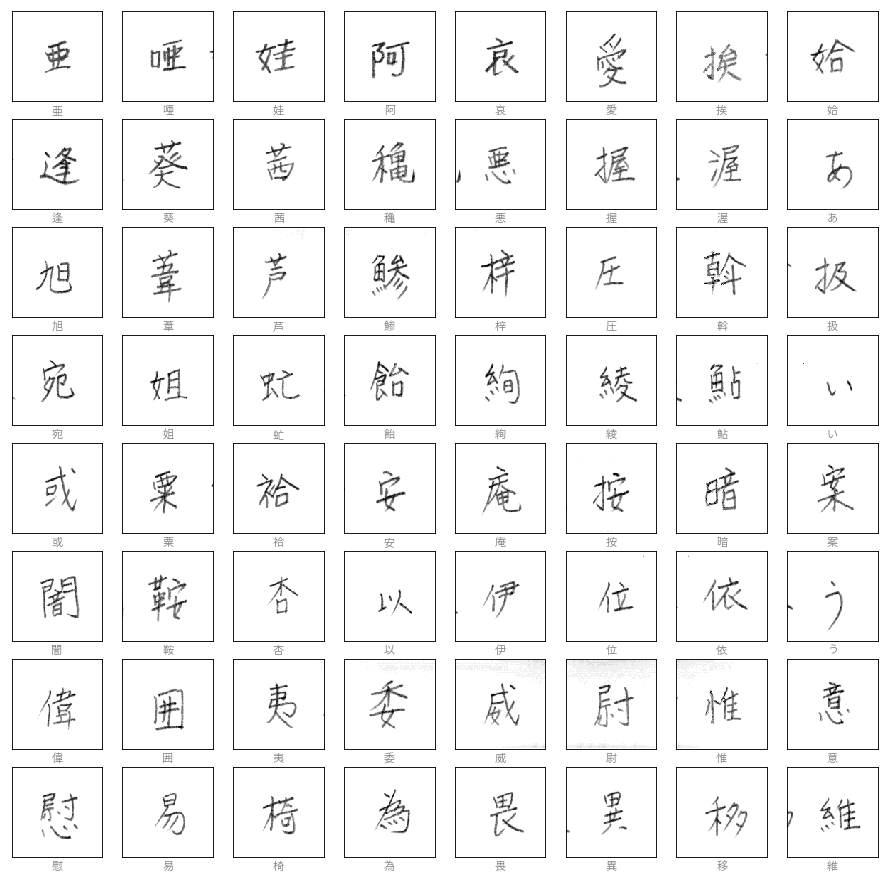

In [27]:
et.sqr_plot_numpy(new_data, new_labels, 8, (127, 128))

The ETL9 charecters are smaller but mostly centered in the frames. I'll blow them up when preprocessing. Also note that since the ETL8 charecters are a subset of the joyo kanji while the ETL9 are the whole joyo kanji, we'll remove samples we haven't trained on.

In [28]:
new_data_processed = np.zeros((1000, im_resize[0] * im_resize[1]), dtype=np.float16)
new_labels_processed = np.zeros(1000, dtype=np.unicode)
new_labels_inds = np.zeros(1000, dtype=np.int)

In [29]:
i = 0
j = 0

while j < 1000 and i < new_data.shape[0]:
    if i != 0 and ((i / new_data.shape[0]) * 100) % 10 == 0:
        print(i, end=' ')
    if lookup_indicator.get(new_labels[i]) is not None:
        img = np.copy(new_data[i]).reshape((127, 128))[25:105, 25:105]
        normalized = img / img.max()
        resized = transform.resize(normalized, im_resize)
        reduced = (resized > .275).astype(int)
        new_data_processed[j] = reduced.flatten().astype(np.float16)
        new_labels_processed[j] = new_labels[i]
        new_labels_inds[j] = lookup_indicator[new_labels[i]]
        j += 1
        
    i += 1

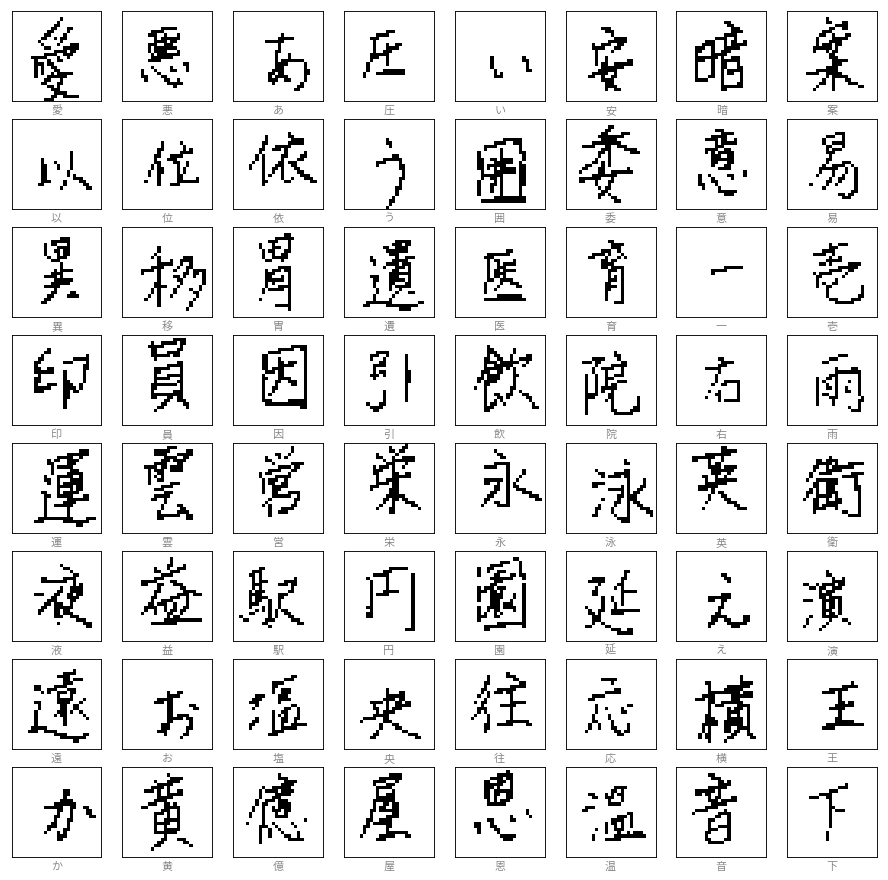

In [30]:
et.sqr_plot_numpy(new_data_processed.astype(np.float32), new_labels_processed, 8, im_resize)

Those look a little closer to the training data, though I think the writing style for many of these charecters is somewhat different. Lets put our model to the test.

In [31]:
with tf.Session() as session:
    ckpt = tf.train.get_checkpoint_state('.')
    saver.restore(session, ckpt.model_checkpoint_path)
    feed_dict = {X : new_data_processed}
    prediction = tf.argmax(logits, 1)
    best = session.run([prediction],feed_dict)

INFO:tensorflow:Restoring parameters from ./j_char_model


In [32]:
best[0].shape

(1000,)

Now we've got our predictions for the new charecters. Lets get them into a more useful format.

In [33]:
prediction_labels = np.zeros(1000, dtype=np.unicode)
prediction_correct = np.zeros(1000, dtype=np.bool)
prediction_caption = []

In [34]:
for i in range(1000):
    prediction_labels[i] = lookup_character[best[0][i]]
    if new_labels_processed[i] == lookup_character[best[0][i]]:
        prediction_caption.append(new_labels_processed[i])
    else:
        prediction_caption.append(f"act: {new_labels_processed[i]}, pred: {lookup_character[best[0][i]]}")
    prediction_correct[i] = new_labels_processed[i] == lookup_character[best[0][i]]

What labels did the model assign to these charecters? (labels in grey beneath images are the predicted charecter)

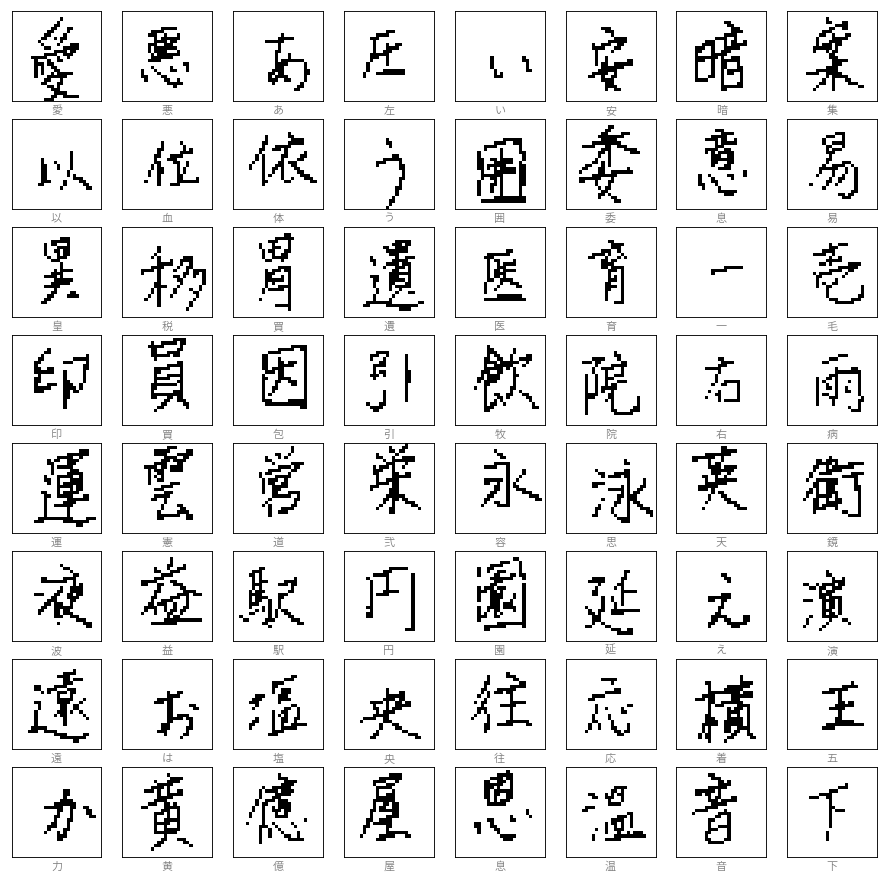

In [35]:
et.sqr_plot_numpy(new_data_processed.astype(np.float32), prediction_labels, 8, im_resize)

Let's make it easier to see where it got mixed up.

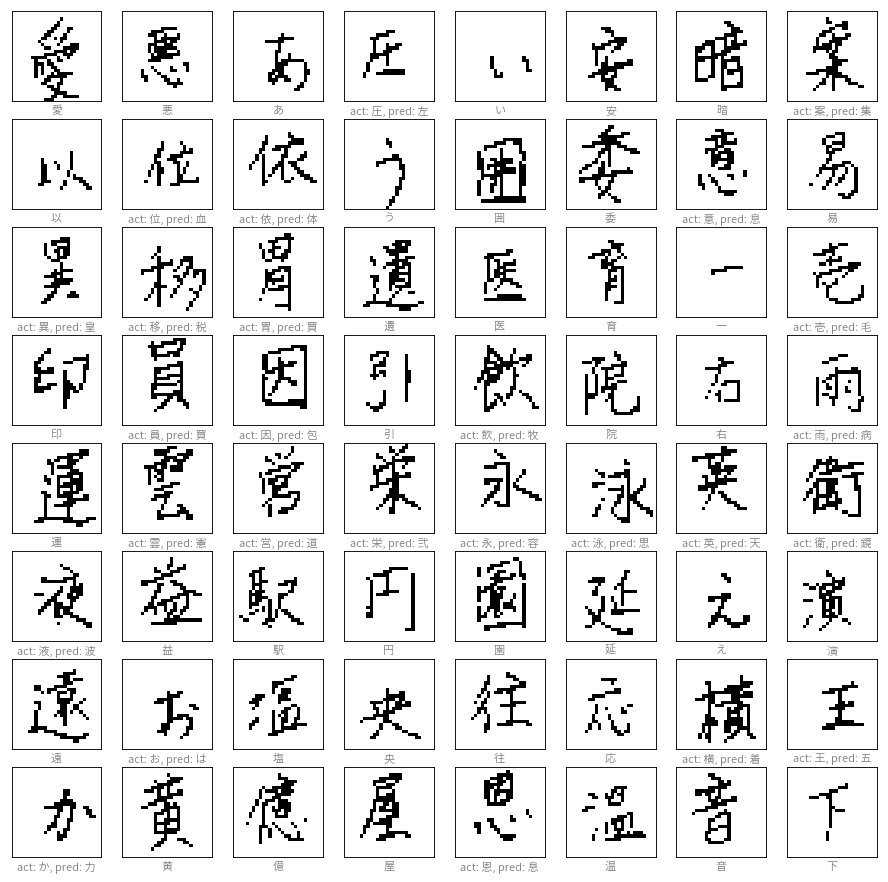

In [36]:
et.sqr_plot_numpy(new_data_processed.astype(np.float32), prediction_caption, 8, im_resize)

In most cases where it guessed wrong, there is a clear similarity between the charecters. I think this new processed ETL9 data is of lower quality than the ETL8 training data, as blowing up the images has merged some of the strokes together. Lets see some more predictions.

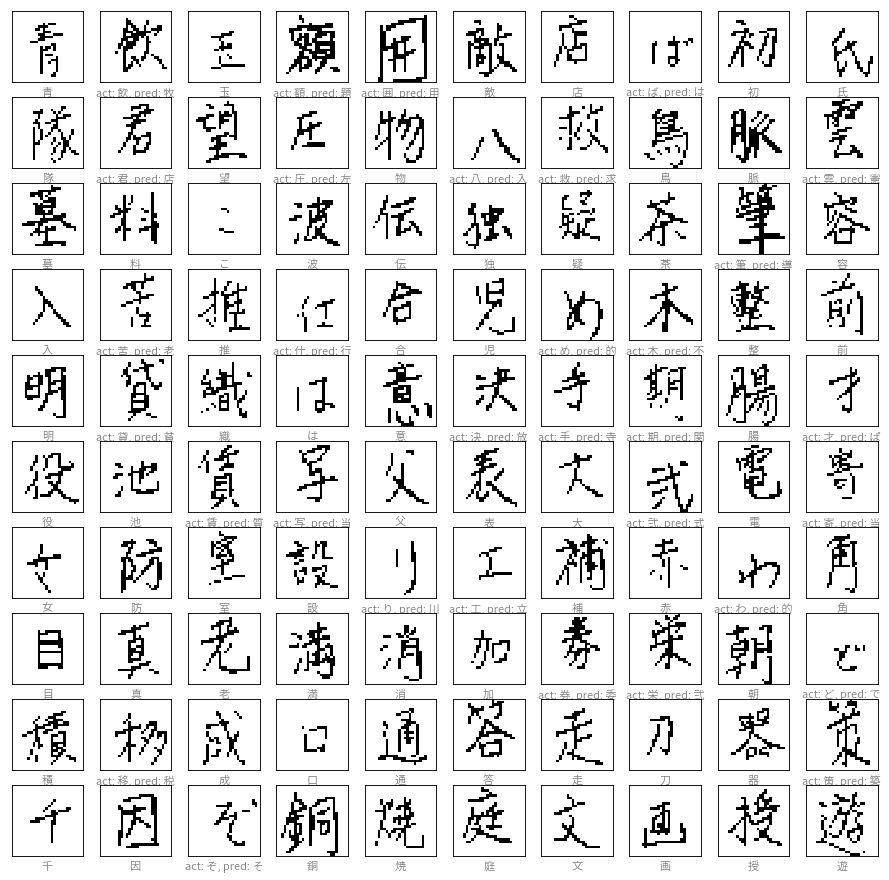

In [37]:
et.sqr_plot_numpy(new_data_processed.astype(np.float32), prediction_caption, 10, im_resize, shuffel=True)

In [38]:
np.mean(prediction_correct.astype(np.int))

0.725

72% correct on a new dataset! 

## Conclusions

With networks predicting MNIST at 99.8%, it would seem as though digit classification has been cracked. But for AI to advance, we'll have to figure out effective classification for more than just 10 categories. Recent results show that we're well on our way. In 2016, a Stanford student wrote a [paper](cs231n.stanford.edu/reports/2016/pdfs/262_Report.pdf) on classifying this ETL dataset at 97% accuracy, and Google, Microsoft and Apple all have Chinese and Japanese character classifiers accuracies high enough to be used in production. Convolutional neural networks seem to be at the center of all these projects, or at least those of which the inner workings have been publicized.  

This was my first real experience with CNNs, and I'm more impressed with their power than I thought I'd be. I think that with access to more powerful hardware, even better results could be achieved by implementing popular CNN architectures and tweaking them to this problem.  

Additionally, this was my first real experience writing my own TensorFlow code. I can't say I followed any best practices or used the most efficient functions for this task, as TensorFlow turned out to be way more complicated than I had imagined. I plan to continue learning and working with it, though I would also like to get more experience with other machine learning libraries.

I had hoped to implement a simple CNN from scratch, but ultimately focused on improving results of the classification experiment instead. The book I was following, Hands On Machine Learning with Scikit Learn and Tensorflow, gives examples for implementing one in numpy and only using tensorflow to manage the training. I still hope to finish my own toy implementation.

The most time consuming part of the project ended up being attempting to parse and process the data from its non standard and somewhat archaic format. I would have liked to have run more experiments with different levels and types of preprocessing, but didn't have the time to do so in this report. I intend to keep working on this project, and hope to extend it to a self contained application that can process input directly from a scan or camera.


## References

Aurélien Géron, 2017, Hands-On Machine Learning with Scikit-Learn & Tensorflow, O'Reilly

Charlie Tsai, 2016, Recognizing Handwritten Japanese Characters Using Deep Convolutional
Neural Networks, Stanford

Code to parse the ETL database adapted from that provided by National Institute of Advanced Industrial Science and Technology (ETL maintainer)

In [26]:
import io
from IPython.nbformat import current
import glob
#nbfile = glob.glob('Project Report Example.ipynb')
nbfile = ["Holmgren-FinalProject.ipynb"]
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)


Word count for file Holmgren-FinalProject.ipynb is 2278
